# Motor Premium Dataset - MLP Classifier Model Application

This Jupyter Notebooks is an initial study of the application of sklearn neural network MLP Classifier model. <br>
The model is applied to dataset MotorPremiums, which is supplied separately in .csv format. <br><br>
This file contains 8 main sessions:
- Data Exploration
- Basic Data Cleaning
- Definition of Target
- Train, Test, Validate subsets split
- Model Fitting
- Predictions on Validation Subset
- Predictions on Test Subset

## Data Exploration

In [1]:
# Libraries used in this Notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
# Import the raw data into the programme and save as a Pandas dataframe to allow tabular visualisation
dataFile = pd.read_csv('..\MotorPremiums.csv')

In [3]:
# Visualise data information, which includes the data type of each field
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4387 non-null   object 
 1   Age             4387 non-null   int64  
 2   Gender          4387 non-null   object 
 3   LicenceCountry  4387 non-null   object 
 4   Yrs DL          4387 non-null   int64  
 5   Points          4387 non-null   int64  
 6   NCD             4387 non-null   int64  
 7   Engine cc       4387 non-null   int64  
 8   Ins Group       4387 non-null   int64  
 9   Stored          4387 non-null   object 
 10  Car Age         4387 non-null   int64  
 11  Premium         4387 non-null   float64
dtypes: float64(1), int64(7), object(4)
memory usage: 411.4+ KB


In [4]:
#Visualise the data in tabular format and assess if you agree with the data types
dataFile.head()

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
0,B69193007,52,M,UK,16,0,0,1200,4,Garage,2,195.32
1,B58763002,46,F,UK,22,8,1,1400,2,Garage,7,225.09
2,A57010377,59,F,UK,9,0,0,1400,5,Garage,14,201.08
3,B61470950,62,M,UK,35,0,0,1400,4,0,12,211.76
4,B43586226,59,F,UK,3,0,4,1400,5,Road,13,251.49


In [5]:
# Visualise the correlation coefficient between the different variables
dataFile.corr()

,Age,Yrs DL,Points,NCD,Engine cc,Ins Group,Car Age,Premium
Age,1.000000,0.639519,0.024085,-0.004407,0.013961,-0.021256,0.019851,0.402763
Yrs DL,0.639519,1.000000,0.006567,0.001876,0.009164,-0.019748,0.022919,0.442921
Points,0.024085,0.006567,1.000000,-0.017312,0.007375,-0.023043,-0.006144,0.330168
NCD,-0.004407,0.001876,-0.017312,1.000000,0.009170,0.004559,-0.025132,0.634157
Engine cc,0.013961,0.009164,0.007375,0.009170,1.000000,0.230337,-0.016065,0.085644
Ins Group,-0.021256,-0.019748,-0.023043,0.004559,0.230337,1.000000,0.013587,0.211748
Car Age,0.019851,0.022919,-0.006144,-0.025132,-0.016065,0.013587,1.000000,0.171124
Premium,0.402763,0.442921,0.330168,0.634157,0.085644,0.211748,0.171124,1.000000


Using histograms, the below code visualises the distribution of numerical variables

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Yrs DL'}>],
       [<AxesSubplot:title={'center':'Points'}>,
        <AxesSubplot:title={'center':'NCD'}>],
       [<AxesSubplot:title={'center':'Engine cc'}>,
        <AxesSubplot:title={'center':'Ins Group'}>],
       [<AxesSubplot:title={'center':'Car Age'}>,
        <AxesSubplot:title={'center':'Premium'}>]], dtype=object)

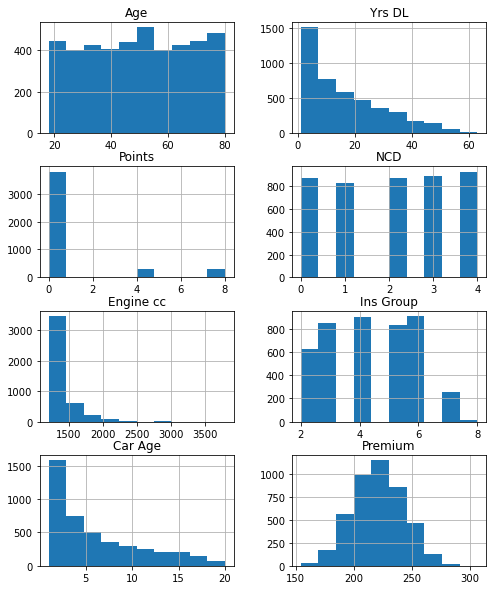

In [6]:
#Define the number of subplots (4 rows with 2 columns) to plot all the 8 numerical variables
fig, axis = plt.subplots(4,2, figsize=(8,10))

#create histogram for each column in DataFrame
dataFile.hist(ax=axis)

Using bar plots, the below code visualises the distribution of categorical variables

<AxesSubplot:>

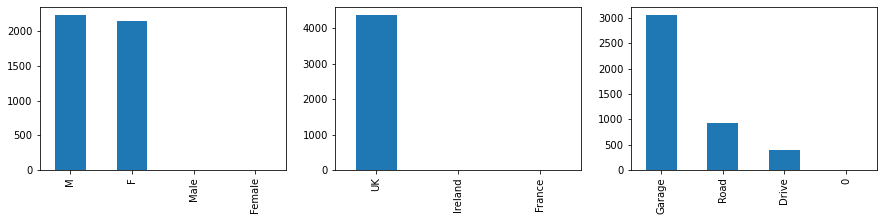

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
dataFile['Gender'].value_counts().plot(ax=axes[0], kind='bar')
dataFile['LicenceCountry'].value_counts().plot(ax=axes[1], kind='bar')
dataFile['Stored'].value_counts().plot(ax=axes[2], kind='bar')

## Basic Data Cleaning

In the below steps, 3 changes have been performed: <br>
- The Gender column has been fixed on typos where Female is set to F and Male is set to M.
- The dataset has been filtered to only values where LicenceCountry is equal to "UK".
- The dataset has been filtered out any values where Stored is equal to "0".

In [8]:
dataFile['Gender'] = np.where(dataFile['Gender']=="Female", "F",
                             np.where(dataFile['Gender']=="Male", "M", dataFile['Gender']))

In [9]:
dataFile = dataFile[dataFile.LicenceCountry=='UK']
dataFile = dataFile[dataFile.Stored!='0']

<AxesSubplot:>

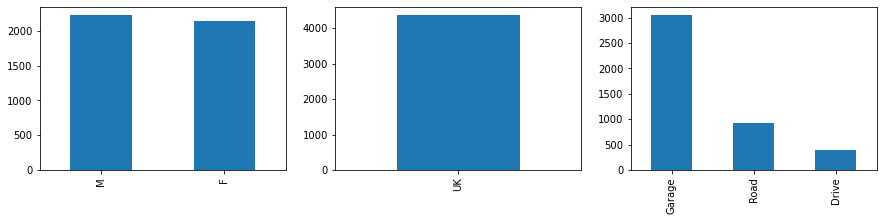

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
dataFile['Gender'].value_counts().plot(ax=axes[0], kind='bar')
dataFile['LicenceCountry'].value_counts().plot(ax=axes[1], kind='bar')
dataFile['Stored'].value_counts().plot(ax=axes[2], kind='bar')

Below, ID is removed from the data as this is not relevant to the model.<br>
LicenceCountry feature is also removed as after the intial cleaning, the column had standard deviation of 0, with all values being "UK".

In [11]:
# Drop IDs as this is irrelant
dataFile = dataFile.drop(["ID","LicenceCountry"], axis='columns')

In the following step we apply one-hot encoding to the categorical features of the dataset so the data is ready to be fitted to the model.

In [14]:
# Implement One Hot Encoding to the data
dataFile_encoded = pd.get_dummies(dataFile, columns = ['Gender', 'Stored'])
dataFile_encoded

,Age,Yrs DL,Points,NCD,Engine cc,Ins Group,Car Age,Premium,Gender_F,Gender_M,Stored_Drive,Stored_Garage,Stored_Road
0,52,16,0,0,1200,4,2,195.32,0,1,0,1,0
1,46,22,8,1,1400,2,7,225.09,1,0,0,1,0
2,59,9,0,0,1400,5,14,201.08,1,0,0,1,0
4,59,3,0,4,1400,5,13,251.49,1,0,0,0,1
5,78,57,4,1,1800,3,1,229.46,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4382,28,8,0,3,1200,4,1,214.03,0,1,0,1,0
4383,76,41,0,4,1600,5,1,265.50,1,0,0,0,1
4384,50,32,0,4,1200,2,1,250.51,0,1,0,0,1
4385,36,12,8,3,1200,5,1,264.92,1,0,0,0,1


## Define the Target column and separate from rest of the dataset

Define the target variable (column Premium) and features to be used for training the model (all other columns except target column)

In [15]:
target_column = 'Premium'
X = dataFile_encoded.drop(columns=[target_column])
y = dataFile_encoded[target_column]

## Split dataset into Training, Validation and Test Subsets

The next step is then to split the training, validation and testing data. We first separate training and testing, then further subsegment the training into final training subset and validation subset.

In [16]:
# Split the data into training (80%) and test (20%) sets
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Further split the training set into training and validation sets (80% training, 20% validation)
final_train_data, validation_data, final_train_labels, validation_labels = train_test_split(train_data, train_labels, 
                                                                                            test_size=0.2, random_state=42)

print("Training Set number of rows: ",len(final_train_data))
print("Validation Set number of rows: ",len(validation_data))
print("Test Set number of rows: ",len(test_data))

Training Set number of rows:  2799
Validation Set number of rows:  700
Test Set number of rows:  875


## Definition of Hyperparameters and Training of the Model

In [18]:
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(final_train_data, final_train_labels)

MLPRegressor(max_iter=500, random_state=42)

## Make predictions on validation data

In [19]:
validation_predictions = nn_model.predict(validation_data)

In [20]:
# Evaluate the model on the validation data
mse = mean_squared_error(validation_labels, validation_predictions)
r2 = r2_score(validation_labels, validation_predictions)

print(f"Mean Squared Error on Validation Set: {mse:.2f}")
print(f"R^2 Score on Validation Set: {r2:.2f}")

# Display predictions
print("\nValidation Predictions:")
print(validation_predictions)

Mean Squared Error on Validation Set: 10.29
R^2 Score on Validation Set: 0.98

Validation Predictions:
[253.51921352 180.47848543 302.80261759 227.90313431 208.67948825
 210.09876057 226.63823238 201.73511906 237.71986597 233.68933645
 230.92924296 218.33884759 214.99276035 217.66608453 251.44114553
 200.59966546 205.53192333 212.05640514 182.44292107 246.30533725
 213.16004725 243.7217009  186.23884175 230.18789499 220.45879988
 200.70981863 198.0551369  206.95212413 235.49017801 196.65411417
 246.6117247  228.28056711 249.53206058 237.59939256 246.66443436
 220.06020915 237.21312431 222.01390875 197.82912831 208.44483425
 203.14100568 230.92713935 212.39758979 207.04342421 217.9044363
 225.80410801 194.03468634 198.02975188 207.91331133 194.29073427
 207.38740406 253.11260692 238.67009843 226.39353601 186.27925791
 223.74894718 198.43997648 211.963156   228.56740525 253.75414593
 206.79848676 195.9526861  171.09755431 210.20376301 189.82353698
 253.29138905 209.46382786 233.44903577 

### Visualisation of Predictions

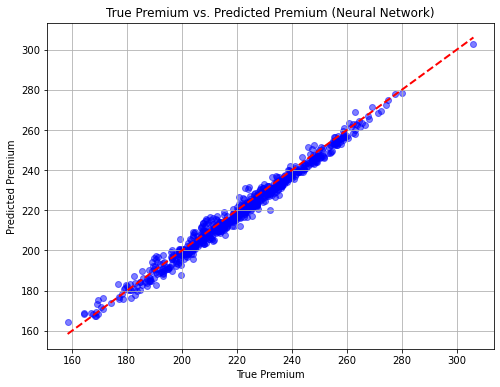

Correlation between true and predicted premiums: -0.02

True vs Predicted Premiums:
      True Premium  Predicted Premium
4319        255.81         253.519214
3759        184.65         180.478485
25          306.07         302.802618
1453        226.33         227.903134
3073        212.41         208.679488


In [21]:
# Visualise predictions vs. true values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(validation_labels, validation_predictions, alpha=0.5, color='blue')
plt.plot([validation_labels.min(), validation_labels.max()], 
         [validation_labels.min(), validation_labels.max()], 'r--', lw=2)
plt.title('True Premium vs. Predicted Premium (Neural Network)')
plt.xlabel('True Premium')
plt.ylabel('Predicted Premium')
plt.grid(True)
plt.show()

# Compute the correlation between true and predicted values
correlation = pd.Series(validation_labels).corr(pd.Series(validation_predictions))
print(f"Correlation between true and predicted premiums: {correlation:.2f}")

# Display the predictions and true values in a data table
comparison_df = pd.DataFrame({
    'True Premium': validation_labels,
    'Predicted Premium': validation_predictions
})

print("\nTrue vs Predicted Premiums:")
print(comparison_df.head())

## Final Assessment: Predictions on Test Data

In [22]:
test_predictions = nn_model.predict(test_data)

In [23]:
# Evaluate the model on the validation data
mse_test = mean_squared_error(test_labels, test_predictions)
r2_test = r2_score(test_labels, test_predictions)

print(f"Mean Squared Error on Validation Set: {mse_test:.2f}")
print(f"R^2 Score on Validation Set: {r2_test:.2f}")

Mean Squared Error on Validation Set: 10.50
R^2 Score on Validation Set: 0.98


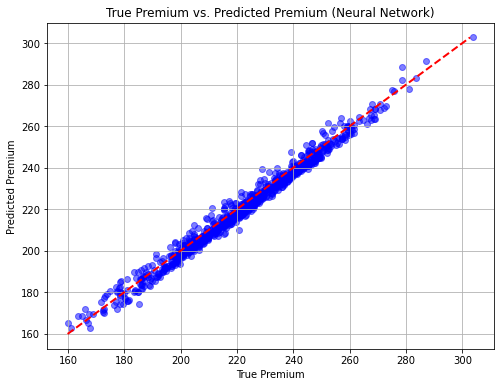

Correlation between true and predicted premiums: 0.03

True vs Predicted Premiums:
      True Premium  Predicted Premium
1573        206.38         200.178625
464         243.79         245.085531
1617        249.69         244.656212
1486        219.36         220.610708
3815        234.75         236.379139


In [24]:
# Visualise predictions vs. true values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_labels, test_predictions, alpha=0.5, color='blue')
plt.plot([test_labels.min(), test_predictions.max()], 
         [test_labels.min(), test_predictions.max()], 'r--', lw=2)
plt.title('True Premium vs. Predicted Premium (Neural Network)')
plt.xlabel('True Premium')
plt.ylabel('Predicted Premium')
plt.grid(True)
plt.show()

# Compute the correlation between true and predicted values
correlation_test = pd.Series(test_labels).corr(pd.Series(test_predictions))
print(f"Correlation between true and predicted premiums: {correlation_test:.2f}")

# Display the predictions and true values in a data table
comparison_df_test = pd.DataFrame({
    'True Premium': test_labels,
    'Predicted Premium': test_predictions
})

print("\nTrue vs Predicted Premiums:")
print(comparison_df_test.head())